## Step 1 - Argo Data

In [139]:
# load libraries
import numpy as np
import pyxpcm
from pyxpcm.models import pcm
from argopy import DataFetcher as ArgoDataFetcher

import cartopy.crs as ccrs 
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import xarray as xr

import gsw 

In [140]:
def get_argo_region_data(llon,rlon,llat,ulat,depthmin,depthmax,time_in,time_f):
        # Function to get argo data for a given lat,lon box (using Argopy), 
    # and return a 2D array collection of vertical profile for the given region
    #llon: left longitude
    #rlon: right longtidue
    #ulat: upper latitude
    #llat: lower latitude
    ds_points = ArgoDataFetcher(src='erddap').region([llon,rlon, llat,ulat, depthmin, depthmax,time_in,time_f]).to_xarray()
    ds_profiles = ds_points.argo.point2profile()
    return ds_profiles

In [141]:
llon=40;rlon=110
ulat=25;llat=0
depthmin=0;depthmax=500
# June
time_in='2018-05'
time_f='2018-06'
ds = get_argo_region_data(llon,rlon,llat,ulat,depthmin,depthmax,time_in,time_f)
ds

<xarray.Dataset>
Dimensions:          (N_LEVELS: 400, N_PROF: 725)
Coordinates:
    LONGITUDE        (N_PROF) float64 91.29 63.01 64.11 ... 62.21 64.84 75.25
    LATITUDE         (N_PROF) float64 4.117 17.76 19.16 ... 23.26 7.728 2.732
  * N_PROF           (N_PROF) int32 602 425 371 398 344 ... 104 666 486 582 598
  * N_LEVELS         (N_LEVELS) int32 0 1 2 3 4 5 6 ... 394 395 396 397 398 399
    TIME             (N_PROF) datetime64[ns] 2018-05-01T04:07:00 ... 2018-05-...
Data variables:
    CYCLE_NUMBER     (N_PROF) int32 192 89 89 89 89 199 ... 175 6 213 135 102
    DATA_MODE        (N_PROF) <U1 'A' 'A' 'A' 'A' 'A' ... 'D' 'R' 'A' 'D' 'D'
    DIRECTION        (N_PROF) <U1 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER  (N_PROF) int32 2902702 2902258 2902256 ... 2902619 2902669
    POSITION_QC      (N_PROF) int32 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1
    PRES             (N_PROF, N_LEVELS) float32 4.5 6.4 8.5 10.4 ... nan nan nan
    PRES_QC          (N_PROF) int32 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1
    PSAL             (N_PROF, N_LEVELS) float32 34.317 34.317 34.317 ... nan nan
    PSAL_QC          (N_PROF) int32 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 2 1 1 1 1 1
    TEMP             (N_PROF, N_LEVELS) float32 29.825 29.818 29.814 ... nan nan
    TEMP_QC          (N_PROF) int32 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1
    TIME_QC          (N_PROF) int32 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1
Attributes:
    DATA_ID:              ARGO
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         https://www.ifremer.fr/erddap
    Fetched_by:           Shikha Singh
    Fetched_date:         2020/08/14
    Fetched_constraints:  phy_[x=40.00/110.00; y=0.00/25.00; z=0.0/500.0; t=2...
    Fetched_uri:          https://www.ifremer.fr/erddap/tabledap/ArgoFloats.n...
    history:              Variables filtered according to DATA_MODE; Variable...

## (i) Get data

In [142]:
ds = get_argo_region_data(llon,rlon,llat,ulat,depthmin,depthmax,time_in,time_f)
ds

<xarray.Dataset>
Dimensions:          (N_LEVELS: 400, N_PROF: 725)
Coordinates:
    LONGITUDE        (N_PROF) float64 91.29 63.01 64.11 ... 62.21 64.84 75.25
    LATITUDE         (N_PROF) float64 4.117 17.76 19.16 ... 23.26 7.728 2.732
  * N_PROF           (N_PROF) int32 602 425 371 398 344 ... 104 666 486 582 598
  * N_LEVELS         (N_LEVELS) int32 0 1 2 3 4 5 6 ... 394 395 396 397 398 399
    TIME             (N_PROF) datetime64[ns] 2018-05-01T04:07:00 ... 2018-05-...
Data variables:
    CYCLE_NUMBER     (N_PROF) int32 192 89 89 89 89 199 ... 175 6 213 135 102
    DATA_MODE        (N_PROF) <U1 'A' 'A' 'A' 'A' 'A' ... 'D' 'R' 'A' 'D' 'D'
    DIRECTION        (N_PROF) <U1 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER  (N_PROF) int32 2902702 2902258 2902256 ... 2902619 2902669
    POSITION_QC      (N_PROF) int32 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1
    PRES             (N_PROF, N_LEVELS) float32 4.5 6.4 8.5 10.4 ... nan nan nan
    PRES_QC          (N_PROF) int32 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1
    PSAL             (N_PROF, N_LEVELS) float32 34.317 34.317 34.317 ... nan nan
    PSAL_QC          (N_PROF) int32 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 2 1 1 1 1 1
    TEMP             (N_PROF, N_LEVELS) float32 29.825 29.818 29.814 ... nan nan
    TEMP_QC          (N_PROF) int32 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1
    TIME_QC          (N_PROF) int32 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1
Attributes:
    DATA_ID:              ARGO
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         https://www.ifremer.fr/erddap
    Fetched_by:           Shikha Singh
    Fetched_date:         2020/08/14
    Fetched_constraints:  phy_[x=40.00/110.00; y=0.00/25.00; z=0.0/500.0; t=2...
    Fetched_uri:          https://www.ifremer.fr/erddap/tabledap/ArgoFloats.n...
    history:              Variables filtered according to DATA_MODE; Variable...

## Plot

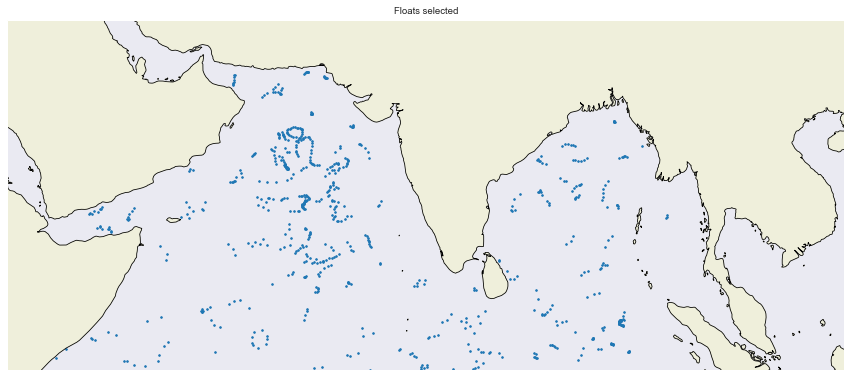

In [143]:
plt.figure(figsize=(15,8))
    
ax = plt.subplot(111, projection=ccrs.PlateCarree()
                 #Mercator()
                 )
ax.set_extent([llon,rlon,llat,ulat])
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
sc = ax.scatter(ds['LONGITUDE'], ds['LATITUDE'], s=3)

plt.title('Floats selected')
plt.show()

fig.savefig('floats.png',dpi=1000)

## (ii) Check QC

According to Argo manual: 
- QC flag values of 1, 2, 5, or 8 are GOOD data
- QC flag values of 9 (missing) are NOT USED in the computation
- All other QC flag values are BAD data 

Page 57 in http://www.odip.org/documents/odip/downloads/20/argo-dm-user-manual.pdf

In [144]:
goodflags=[1,2,5,8]
badflags=[3,4,6,7,9]
QC=['POSITION_QC','PRES_QC','TEMP_QC','PSAL_QC','TIME_QC']
for q in QC:
    data=np.array(ds[q])
    for f in badflags:
        if np.any(data)==f: 
            print('Bad data in '+str(q)+' QC flag: '+str(f))

## (iii) Delayed X Real time Data

DATA_MODE(PROF_N):

R : real time data

D : delayed mode data

A : real time data with adjusted values

In [145]:
ds.DATA_MODE

<xarray.DataArray 'DATA_MODE' (N_PROF: 725)>
array(['A', 'A', 'A', 'A', 'A', 'A', 'R', 'D', 'A', 'A', 'D', 'A', 'D',
       'A', 'D', 'A', 'A', 'D', 'D', 'D', 'D', 'A', 'A', 'A', 'A', 'R',
       'A', 'A', 'A', 'A', 'A', 'D', 'A', 'A', 'A', 'A', 'D', 'A', 'R',
       'A', 'D', 'A', 'A', 'A', 'A', 'A', 'A', 'D', 'D', 'D', 'D', 'A',
       'A', 'R', 'A', 'A', 'A', 'A', 'A', 'A', 'D', 'D', 'D', 'R', 'A',
       'A', 'D', 'D', 'A', 'A', 'A', 'R', 'A', 'A', 'A', 'A', 'A', 'D',
       'A', 'A', 'A', 'A', 'A', 'R', 'D', 'A', 'A', 'R', 'A', 'A', 'R',
       'A', 'D', 'D', 'A', 'A', 'D', 'D', 'A', 'A', 'A', 'A', 'R', 'A',
       'A', 'A', 'A', 'A', 'A', 'D', 'D', 'R', 'D', 'A', 'A', 'A', 'A',
       'A', 'A', 'D', 'A', 'R', 'A', 'A', 'D', 'A', 'A', 'A', 'A', 'A',
       'D', 'D', 'D', 'A', 'A', 'A', 'A', 'A', 'A', 'D', 'A', 'D', 'A',
       'D', 'A', 'R', 'A', 'D', 'A', 'R', 'A', 'A', 'A', 'A', 'A', 'D',
       'A', 'D', 'D', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'R', 'R', 'A',
       'A', 'D', 'A', 'D', 'A', 'R', 'A', 'A', 'A', 'D', 'A', 'A', 'R',
       'A', 'A', 'A', 'D', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'D', 'A', 'D', 'A', 'D', 'D', 'A', 'R', 'A', 'A', 'D', 'A',
       'R', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'D', 'D', 'R',
       'A', 'D', 'R', 'D', 'D', 'D', 'A', 'R', 'D', 'A', 'A', 'A', 'D',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'D', 'A', 'D', 'D',
       'D', 'A', 'D', 'A', 'A', 'A', 'A', 'D', 'A', 'A', 'A', 'A', 'R',
...
       'A', 'D', 'A', 'D', 'D', 'D', 'D', 'A', 'A', 'A', 'A', 'D', 'A',
       'A', 'A', 'A', 'A', 'R', 'A', 'A', 'D', 'A', 'A', 'A', 'A', 'A',
       'A', 'D', 'D', 'D', 'D', 'A', 'R', 'A', 'D', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'D', 'A', 'A', 'R', 'A', 'A', 'A', 'A',
       'D', 'A', 'R', 'D', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'R', 'A', 'D', 'D', 'R', 'A', 'R', 'A',
       'A', 'D', 'D', 'D', 'D', 'A', 'A', 'R', 'A', 'A', 'A', 'A', 'D',
       'D', 'A', 'A', 'A', 'A', 'R', 'D', 'R', 'A', 'A', 'A', 'D', 'D',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'D', 'A', 'A', 'A', 'A',
       'A', 'D', 'D', 'A', 'A', 'A', 'A', 'D', 'A', 'A', 'A', 'A', 'R',
       'R', 'A', 'D', 'D', 'A', 'R', 'A', 'R', 'A', 'A', 'A', 'A', 'R',
       'D', 'A', 'R', 'A', 'D', 'D', 'A', 'A', 'A', 'A', 'R', 'R', 'D',
       'A', 'A', 'A', 'D', 'D', 'R', 'R', 'R', 'A', 'A', 'A', 'D', 'D',
       'R', 'A', 'A', 'R', 'D', 'A', 'D', 'R', 'A', 'A', 'A', 'A', 'A',
       'A', 'D', 'R', 'A', 'A', 'A', 'A', 'A', 'A', 'R', 'D', 'D', 'D',
       'R', 'R', 'D', 'A', 'R', 'A', 'A', 'A', 'D', 'A', 'A', 'A', 'R',
       'R', 'A', 'A', 'A', 'A', 'A', 'A', 'R', 'A', 'R', 'D', 'D', 'A',
       'D', 'R', 'A', 'R', 'A', 'D', 'D', 'R', 'A', 'R', 'D', 'D', 'R',
       'D', 'A', 'A', 'A', 'R', 'A', 'A', 'D', 'R', 'A', 'A', 'A', 'A',
       'A', 'A', 'D', 'A', 'A', 'D', 'R', 'A', 'D', 'D'], dtype='<U1')
Coordinates:
    LONGITUDE  (N_PROF) float64 91.29 63.01 64.11 64.3 ... 62.21 64.84 75.25
    LATITUDE   (N_PROF) float64 4.117 17.76 19.16 17.88 ... 23.26 7.728 2.732
  * N_PROF     (N_PROF) int32 602 425 371 398 344 638 ... 56 104 666 486 582 598
    TIME       (N_PROF) datetime64[ns] 2018-05-01T04:07:00 ... 2018-05-31T23:...
Attributes:
    casted:   1

In [146]:
ds2=ds.where(ds.DATA_MODE=='D',drop=True)
print('We selected '+str(len(ds2.N_PROF))+' from '+str(len(ds.N_PROF)))


We selected 178 from 725


In [147]:
ds2

<xarray.Dataset>
Dimensions:          (N_LEVELS: 400, N_PROF: 178)
Coordinates:
    LONGITUDE        (N_PROF) float64 47.38 55.04 65.07 ... 56.51 64.84 75.25
    LATITUDE         (N_PROF) float64 2.479 13.02 5.059 ... 14.04 7.728 2.732
  * N_PROF           (N_PROF) int32 83 79 75 87 579 586 ... 90 94 2 104 582 598
  * N_LEVELS         (N_LEVELS) int32 0 1 2 3 4 5 6 ... 394 395 396 397 398 399
    TIME             (N_PROF) datetime64[ns] 2018-05-01T06:17:12 ... 2018-05-...
Data variables:
    CYCLE_NUMBER     (N_PROF) float64 172.0 172.0 172.0 ... 175.0 135.0 102.0
    DATA_MODE        (N_PROF) object 'D' 'D' 'D' 'D' 'D' ... 'D' 'D' 'D' 'D' 'D'
    DIRECTION        (N_PROF) object 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER  (N_PROF) float64 2.902e+06 2.902e+06 ... 2.903e+06
    POSITION_QC      (N_PROF) float64 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
    PRES             (N_PROF, N_LEVELS) float32 3.66 5.66 7.66 ... nan nan nan
    PRES_QC          (N_PROF) float64 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
    PSAL             (N_PROF, N_LEVELS) float32 35.43953 35.4394 ... nan nan
    PSAL_QC          (N_PROF) float64 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
    TEMP             (N_PROF, N_LEVELS) float32 29.492 29.478 29.468 ... nan nan
    TEMP_QC          (N_PROF) float64 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
    TIME_QC          (N_PROF) float64 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
Attributes:
    DATA_ID:              ARGO
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         https://www.ifremer.fr/erddap
    Fetched_by:           Shikha Singh
    Fetched_date:         2020/08/14
    Fetched_constraints:  phy_[x=40.00/110.00; y=0.00/25.00; z=0.0/500.0; t=2...
    Fetched_uri:          https://www.ifremer.fr/erddap/tabledap/ArgoFloats.n...
    history:              Variables filtered according to DATA_MODE; Variable...

## (iii) Vertical Interpolation

' We finally interpolated the data on a regular vertical grid with a 5 m resolution (the original resolution ranges from less than 10 m at the surface to 200 m at the bottom of the profile)' - maze et al. 2017

In [148]:
z=np.arange(10.,500,5.)
ds_interp = ds2.argo.interp_std_levels(z)
print(ds_interp)

<xarray.Dataset>
Dimensions:            (N_PROF: 96, PRES_INTERPOLATED: 98)
Coordinates:
    LONGITUDE          (N_PROF) float64 47.38 55.04 65.07 ... 65.86 62.9 56.51
  * PRES_INTERPOLATED  (PRES_INTERPOLATED) float64 10.0 15.0 ... 490.0 495.0
  * N_PROF             (N_PROF) int32 83 79 75 87 91 101 ... 676 82 78 90 94 104
    LATITUDE           (N_PROF) float64 2.479 13.02 5.059 ... 9.307 14.2 14.04
    TIME               (N_PROF) datetime64[ns] 2018-05-01T06:17:12 ... 2018-0...
Data variables:
    CYCLE_NUMBER       (N_PROF) float64 172.0 172.0 172.0 ... 175.0 175.0 175.0
    DATA_MODE          (N_PROF) object 'D' 'D' 'D' 'D' 'D' ... 'D' 'D' 'D' 'D'
    DIRECTION          (N_PROF) object 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER    (N_PROF) float64 2.902e+06 2.902e+06 ... 2.902e+06
    PRES               (N_PROF, PRES_INTERPOLATED) float32 10.0 15.0 ... 495.0
    PSAL               (N_PROF, PRES_INTERPOLATED) float32 35.43918 ... 35.79...
    TEMP               (N_

So, when we interpolate, the number of profiles decreases a lot, because only the profiles that have data in the interval we asked is kept!

In [149]:
print('The number of profiles changed from  '+str(len(ds2.N_PROF))+ ' to '+str(len(ds_interp.N_PROF)))


The number of profiles changed from  178 to 96


## (v) Pressure to Depth

In [150]:
ds3=ds_interp

In [151]:
p=np.array(ds3.PRES)
lat=np.array(ds3.LATITUDE)
z=np.ones_like(p)
nprof=np.array(ds3.N_PROF)
#z=gsw.z_from_p(p,lat)
for i in np.arange(0,len(nprof)):
    z[i,:]=gsw.z_from_p(p[i,:], lat[i])

In [152]:
p.shape, z.shape

((96, 98), (96, 98))

In [153]:
lat.shape

(96,)

In [154]:
p_interp=np.array(ds3.PRES_INTERPOLATED)
z_interp=gsw.z_from_p(p_interp, 15) # choosing a mid latitude of the basin

z_interp.shape

(98,)

So we can just use the pressure as the depth axis.. I dont think we need to actually convert it.. 

## Make a clean dataset

In [155]:
temp=np.array(ds3.TEMP)
sal=np.array(ds3.PSAL)
depth_var=z
depth=z_interp
lat=np.array(ds3.LATITUDE)
lon=np.array(ds3.LONGITUDE)
time=np.array(ds3.TIME)

In [156]:
temp.shape, nprof.shape, depth_var.shape

((96, 98), (96,), (96, 98))

In [157]:
ds3

<xarray.Dataset>
Dimensions:            (N_PROF: 96, PRES_INTERPOLATED: 98)
Coordinates:
    LONGITUDE          (N_PROF) float64 47.38 55.04 65.07 ... 65.86 62.9 56.51
  * PRES_INTERPOLATED  (PRES_INTERPOLATED) float64 10.0 15.0 ... 490.0 495.0
  * N_PROF             (N_PROF) int32 83 79 75 87 91 101 ... 676 82 78 90 94 104
    LATITUDE           (N_PROF) float64 2.479 13.02 5.059 ... 9.307 14.2 14.04
    TIME               (N_PROF) datetime64[ns] 2018-05-01T06:17:12 ... 2018-0...
Data variables:
    CYCLE_NUMBER       (N_PROF) float64 172.0 172.0 172.0 ... 175.0 175.0 175.0
    DATA_MODE          (N_PROF) object 'D' 'D' 'D' 'D' 'D' ... 'D' 'D' 'D' 'D'
    DIRECTION          (N_PROF) object 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER    (N_PROF) float64 2.902e+06 2.902e+06 ... 2.902e+06
    PRES               (N_PROF, PRES_INTERPOLATED) float32 10.0 15.0 ... 495.0
    PSAL               (N_PROF, PRES_INTERPOLATED) float32 35.43918 ... 35.79...
    TEMP               (N_PROF, PRES_INTERPOLATED) float32 29.46549 ... 13.03...
Attributes:
    DATA_ID:              ARGO
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         https://www.ifremer.fr/erddap
    Fetched_by:           Shikha Singh
    Fetched_date:         2020/08/14
    Fetched_constraints:  phy_[x=40.00/110.00; y=0.00/25.00; z=0.0/500.0; t=2...
    Fetched_uri:          https://www.ifremer.fr/erddap/tabledap/ArgoFloats.n...
    history:              Variables filtered according to DATA_MODE; Variable...

In [158]:
da=xr.Dataset(data_vars={'TEMP':(('N_PROF','DEPTH'),temp),
                        'PSAL':(('N_PROF','DEPTH'),sal),
                        'TIME':(('N_PROF'),time),
                         'LATITUDE':(('N_PROF'),lat),
                         'LONGITUDE':(('N_PROF'),lon),
                         'DEPTH_PROF':(('N_PROF','DEPTH'),depth_var)},
                 coords={'N_PROF':nprof,
                                'DEPTH':depth})
da

<xarray.Dataset>
Dimensions:     (DEPTH: 98, N_PROF: 96)
Coordinates:
  * N_PROF      (N_PROF) int32 83 79 75 87 91 101 95 ... 86 676 82 78 90 94 104
  * DEPTH       (DEPTH) float64 -9.941 -14.91 -19.88 ... -481.6 -486.6 -491.5
Data variables:
    TEMP        (N_PROF, DEPTH) float32 29.46549 29.46133 ... 13.096 13.032451
    PSAL        (N_PROF, DEPTH) float32 35.43918 35.439137 ... 35.794033
    TIME        (N_PROF) datetime64[ns] 2018-05-01T06:17:12 ... 2018-05-31T19...
    LATITUDE    (N_PROF) float64 2.479 13.02 5.059 9.688 ... 9.307 14.2 14.04
    LONGITUDE   (N_PROF) float64 47.38 55.04 65.07 65.0 ... 65.86 62.9 56.51
    DEPTH_PROF  (N_PROF, DEPTH) float32 -9.94474 -14.91693 ... -486.5808 -491.54

### Make model

In [159]:
z = np.arange(0.,-450,-10.) # depth array
pcm_features = {'temperature': z, 'salinity':z} #features that vary in function of depth
m = pcm(K=6, features=pcm_features) # create the 'basic' model


In [160]:
features_in_da= {'temperature': 'TEMP', 'salinity': 'PSAL'}
features_zdim='DEPTH'
m.fit(da, features=features_in_da, dim=features_zdim)

<pcm 'gmm' (K: 6, F: 2)>
Number of class: 6
Number of feature: 2
Feature names: odict_keys(['temperature', 'salinity'])
Fitted: True
Feature: 'temperature'
	 Interpoler: <class 'pyxpcm.utils.Vertical_Interpolator'>
	 Scaler: 'normal', <class 'sklearn.preprocessing._data.StandardScaler'>
	 Reducer: True, <class 'sklearn.decomposition._pca.PCA'>
Feature: 'salinity'
	 Interpoler: <class 'pyxpcm.utils.Vertical_Interpolator'>
	 Scaler: 'normal', <class 'sklearn.preprocessing._data.StandardScaler'>
	 Reducer: True, <class 'sklearn.decomposition._pca.PCA'>
Classifier: 'gmm', <class 'sklearn.mixture._gaussian_mixture.GaussianMixture'>
	 log likelihood of the training set: 73.848651

### Fit model

In [161]:
features_in_ds = {'temperature': 'TEMP', 'salinity': 'PSAL'}
features_zdim='DEPTH'
m.fit(da, features=features_in_da, dim=features_zdim)
m

<pcm 'gmm' (K: 6, F: 2)>
Number of class: 6
Number of feature: 2
Feature names: odict_keys(['temperature', 'salinity'])
Fitted: True
Feature: 'temperature'
	 Interpoler: <class 'pyxpcm.utils.Vertical_Interpolator'>
	 Scaler: 'normal', <class 'sklearn.preprocessing._data.StandardScaler'>
	 Reducer: True, <class 'sklearn.decomposition._pca.PCA'>
Feature: 'salinity'
	 Interpoler: <class 'pyxpcm.utils.Vertical_Interpolator'>
	 Scaler: 'normal', <class 'sklearn.preprocessing._data.StandardScaler'>
	 Reducer: True, <class 'sklearn.decomposition._pca.PCA'>
Classifier: 'gmm', <class 'sklearn.mixture._gaussian_mixture.GaussianMixture'>
	 log likelihood of the training set: 45.449029

In [162]:
da['TEMP'].attrs['feature_name'] = 'temperature'
da['PSAL'].attrs['feature_name'] = 'salinity'
da['DEPTH'].attrs['axis'] = 'Z'
m.fit(da)


<pcm 'gmm' (K: 6, F: 2)>
Number of class: 6
Number of feature: 2
Feature names: odict_keys(['temperature', 'salinity'])
Fitted: True
Feature: 'temperature'
	 Interpoler: <class 'pyxpcm.utils.Vertical_Interpolator'>
	 Scaler: 'normal', <class 'sklearn.preprocessing._data.StandardScaler'>
	 Reducer: True, <class 'sklearn.decomposition._pca.PCA'>
Feature: 'salinity'
	 Interpoler: <class 'pyxpcm.utils.Vertical_Interpolator'>
	 Scaler: 'normal', <class 'sklearn.preprocessing._data.StandardScaler'>
	 Reducer: True, <class 'sklearn.decomposition._pca.PCA'>
Classifier: 'gmm', <class 'sklearn.mixture._gaussian_mixture.GaussianMixture'>
	 log likelihood of the training set: 72.174408

### Classify the data

In [163]:
m.predict(da, features=features_in_ds, dim=features_zdim,inplace=True)
da
m.predict_proba(da, features=features_in_da, inplace=True)
da
for vname in ['TEMP', 'PSAL']:
    da = da.pyxpcm.quantile(m, q=[0.05, 0.5, 0.95], of=vname, outname=vname + '_Q', keep_attrs=True, inplace=True)
da

<xarray.Dataset>
Dimensions:     (DEPTH: 98, N_PROF: 96, pcm_class: 6, quantile: 3)
Coordinates:
  * pcm_class   (pcm_class) int64 0 1 2 3 4 5
  * N_PROF      (N_PROF) int64 83 79 75 87 91 101 95 ... 86 676 82 78 90 94 104
  * DEPTH       (DEPTH) float64 -9.941 -14.91 -19.88 ... -481.6 -486.6 -491.5
  * quantile    (quantile) float64 0.05 0.5 0.95
Data variables:
    TEMP        (N_PROF, DEPTH) float32 29.46549 29.46133 ... 13.096 13.032451
    PSAL        (N_PROF, DEPTH) float32 35.43918 35.439137 ... 35.794033
    TIME        (N_PROF) datetime64[ns] 2018-05-01T06:17:12 ... 2018-05-31T19...
    LATITUDE    (N_PROF) float64 2.479 13.02 5.059 9.688 ... 9.307 14.2 14.04
    LONGITUDE   (N_PROF) float64 47.38 55.04 65.07 65.0 ... 65.86 62.9 56.51
    DEPTH_PROF  (N_PROF, DEPTH) float32 -9.94474 -14.91693 ... -486.5808 -491.54
    PCM_LABELS  (N_PROF) int64 1 4 5 0 2 4 0 5 4 5 1 1 ... 0 0 1 1 5 5 4 5 1 2 4
    PCM_POST    (pcm_class, N_PROF) float64 0.0 0.0 0.0 1.0 ... 1.0 0.0 0.0 0.0
    TEMP_Q      (pcm_class, quantile, DEPTH) float64 30.06 30.06 ... 10.72 10.67
    PSAL_Q      (pcm_class, quantile, DEPTH) float64 34.64 34.64 ... 35.18 35.17

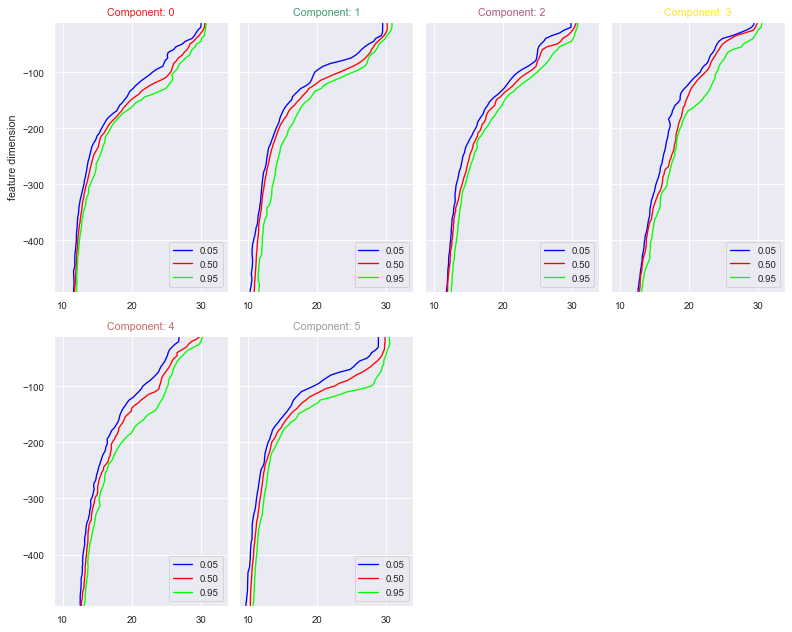

In [164]:
fig, ax = m.plot.quantile(da['TEMP_Q'], maxcols=4, figsize=(10, 8), sharey=True)

fig.savefig('vertical_IO.png',dpi=1000)

E:\Anaconda3\envs\ohw20-proj-pyxpcm\lib\site-packages\pyxpcm\plot.py:111: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  colorbar = plt.colorbar(mappable, **kwargs)
E:\Anaconda3\envs\ohw20-proj-pyxpcm\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
E:\Anaconda3\envs\ohw20-proj-pyxpcm\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


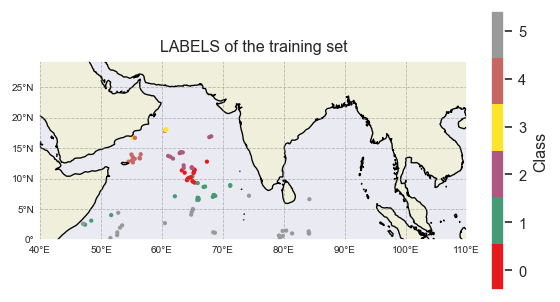

In [165]:
ds=da
proj = ccrs.PlateCarree()
subplot_kw={'projection': proj, 'extent': np.array([40,110,0,25]) + np.array([-0.1,+0.1,-0.1,+0.1])}
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5), dpi=120, facecolor='w', edgecolor='k', subplot_kw=subplot_kw)

kmap = m.plot.cmap()
sc = ax.scatter(ds['LONGITUDE'], ds['LATITUDE'], s=3, c=ds['PCM_LABELS'], cmap=kmap, transform=proj, vmin=0, vmax=m.K)
cl = m.plot.colorbar(ax=ax)

gl = m.plot.latlongrid(ax, dx=10)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.set_title('LABELS of the training set')
plt.show()


fig.savefig('spatial_IO.png',dpi=1000)